# Week 5 - Discrete Random Variables

This is a Jupyter notebook to explore the material in (Ross, 2017, Chp. 5). 



In [1]:
%matplotlib inline
# from now on we'll start each notebook with the library imports
# and special commands to keep these things in one place (which
# is good practice). The line above is jupyter command to get 
# matplotlib to plot inline (between cells)
# Next we import the libraries and give them short names
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

## From outcomes to RVs

Consider the RV, $X$, equal to the sum of the faces of two dice when rolled. Let's remind outselves how to construct a collection of all possible outcomes $(i,j)$, where $i$ is the face value on the first die and $j$ is the face value on the second die. For outcome $(i,j)$ what value would our RV $X$ take? Does every unique outcome lead to a unique value of $X$?

In [2]:
# We can list all the unique outcomes as so:
outcomes = [(d1,d2,d3,d4,d5) for d1 in range(1,7) for d2 in range(1,7) for d3 in range(1,7) for d2 in range(1,7)]
print(f"outcomes = {outcomes}")

# Let's think about pairs (3,4), (4,3) and (5,2), these are all outcomes:
for (i,j) in [(3,4), (4,3), (5,2)]:
    if (i,j) in outcomes:
        print(f"{(i,j)} is a valid outcome and leads to value X = {i+j}")
# clearly these are distinct outcomes but lead to the same value for X

outcomes = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
(3, 4) is a valid outcome and leads to value X = 7
(4, 3) is a valid outcome and leads to value X = 7
(5, 2) is a valid outcome and leads to value X = 7


## Exercise A

1. What are the possible values $x_i$ that RV $X$ can take? Create an ordered numpy array of these values.
2. Calculate and plot the probability distribution (probability mass function) for this RV. (You'll need one probability mass for each value calculated in part 1.)
3. **Optional:** Calculate and plot the cummulative distribution function for the same RV. Note that the probability the sum of two dice take a fractional value is zero, and hence for any integer $2 \leq n \leq 12$ and any non-integer $n < x < n+1$, then $\Pr(X \leq n) = \Pr(X \leq x)$.


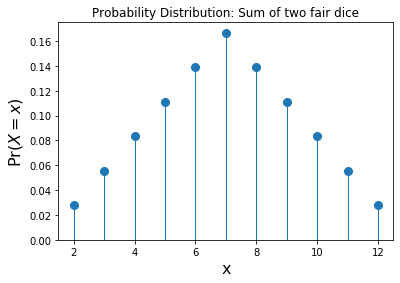

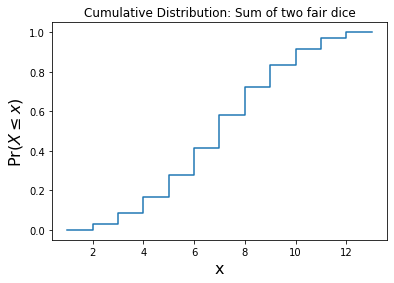

In [3]:
## to complete
## Part A.1
possible_vals_set = set(d1+d2 for d1, d2 in outcomes)
values_X = list(possible_vals_set)
# use build in function sort to ensure values_X are sorted
values_X.sort()
# convert to numpy array
values_X = np.array(values_X)

## Part A.2
# Now calculate the number of outcomes and the number of equally likely
# outcomes giving each result
# number of raw outcomes
N = len(outcomes)
# number of different values_X for the RV X
K = values_X.size
# one way to solve this is to count the number of outcomes that equal
# each value
outcome_counts = { v:0 for v in values_X}
for d1,d2 in outcomes:
    # find the outcome's value
    v = d1+d2
    # increment the associated count
    outcome_counts[v] += 1
# create an empty array to store the masses
prob_masses_X = np.empty(K)
# now go through the dictionary and convert the counts to probabilities
for k in range(K):
    val = values_X[k]
    count = outcome_counts[val] 
    prob_masses_X[k] = count/N

# Let's borrow the line plot function from tutorial 2
def plot_line_graph(xs, ys, title=None):
    plt.figure()
    p = plt.plot(xs, ys, 'o', ms=8)
    # let's get the color of the last plot
    color = p[0].get_color()
    # now plot the vertical lines the same color
    plt.vlines(xs, 0, ys, colors=color, lw=1)
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1)
    plt.ylim(0, None)
    plt.xlabel("x", fontsize=16)
    plt.ylabel("$\Pr(X = x)$", fontsize=16)
    if not title is None:
        plt.title(title)


plot_line_graph(values_X, prob_masses_X, title="Probability Distribution: Sum of two fair dice")

# Part A.3
# To calculate the cummulative probabilities for each possible outcome
# we sum the probability masses of all outcomes less than or equal to this
# So create empty array to fill with these values_X, we include one extra
# cell so we can range from 0 to 1
cumulative_probs = np.empty(K+1)
# and populate it with values_X
for k in range(K+1):
    cumulative_probs[k] = np.sum(prob_masses_X[:k])

# The cumulative distribution plot is a step function as there are 
# discrete increases in probability at a finite number of values_X.
# To facilitate this we'll write a function
def plot_discrete_cdf(values_X, cumulative_probs, xlim, title=None):
    """
    Plot a discrete cumulative distribution function
    """
    # To achieve this we create a new array with duplicated entries
    # we also need x limits to ensure an attractive plot
    K = len(values_X)
    ys = np.empty(2*K+2)
    # x values_X needs to be same length and to include 2 cells for each
    # value as well as the xlimits either end
    xs = np.empty(ys.size)
    xs[0] = xlim[0]
    xs[-1] = xlim[-1]
    for k in range(K+1):
        ys[2*k] = cumulative_probs[k]
        ys[2*k+1] = cumulative_probs[k]
        if k < K:
            xs[2*k+1] = values_X[k]
            xs[2*k+2] = values_X[k]
    ys[-1] = 1.
    plt.figure()
    l = plt.plot(xs, ys)
    plt.xlabel("x", fontsize=16)
    plt.ylabel("$\Pr(X \leq x)$", fontsize=16)
    if not title is None:
        plt.title(title)
    
plot_discrete_cdf(values_X, cumulative_probs, [1,13], title="Cumulative Distribution: Sum of two fair dice")


## Exercise B

Consider the RV $Y$, which is the sum of the shown faces of three fair dice.

1. Evaluate the raw outcomes of the experiment, the possible values of $Y$, and its probability distribution.
2. Calculate the expected value, $E[Y]$. What is expected value for the sum of two dice, $E[X]$?
3. What is the expected value of $X+Y$? What is the expected value of an RV $Z$ which is the sum of $5$ dice?
4. With what probability will the value of $Y$ equal its expected value $E[Y]$?


outcomes = [(1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 1), (1, 4, 2), (1, 4, 3), (1, 4, 4), (1, 4, 5), (1, 4, 6), (1, 5, 1), (1, 5, 2), (1, 5, 3), (1, 5, 4), (1, 5, 5), (1, 5, 6), (1, 6, 1), (1, 6, 2), (1, 6, 3), (1, 6, 4), (1, 6, 5), (1, 6, 6), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 2, 6), (2, 3, 1), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 1), (2, 4, 2), (2, 4, 3), (2, 4, 4), (2, 4, 5), (2, 4, 6), (2, 5, 1), (2, 5, 2), (2, 5, 3), (2, 5, 4), (2, 5, 5), (2, 5, 6), (2, 6, 1), (2, 6, 2), (2, 6, 3), (2, 6, 4), (2, 6, 5), (2, 6, 6), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 2, 5), (3, 2, 6), (3, 3, 1), (3, 3, 2), (3, 3, 3), (3, 3, 4), (3, 3, 5), (3, 3, 6)

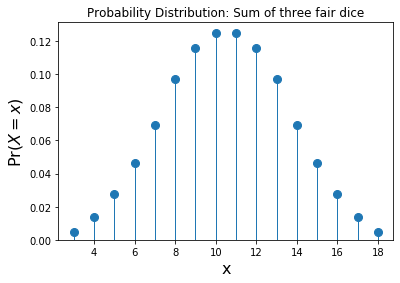

In [4]:
## to complete
## Part B.1
outcomes = [(d1, d2, d3) for d1 in range(1,7) for d2 in range(1,7) for d3 in range(1,7)]
# find the unique sums of the three dice
possible_vals_set = set(d1+d2+d3 for d1, d2, d3 in outcomes)
# convert to list and use build in function sort to ensure values_Y are sorted
values_Y = list(possible_vals_set)
values_Y.sort()
# convert to numpy array
values_Y = np.array(values_Y)
print(f"outcomes = {outcomes}")
print(f"values_Y = {values_Y}")

# In a very similar way as before, we can calculate the numbers
# of outcomes that equal each value. This time we'll use a Counter
# (first seen in week 2). note that we have to import this class
# (see the import block at the top of the notebook)
# count the frequencies of unique values_Y
outcome_counts = Counter(d1+d2+d3 for d1, d2, d3 in outcomes) 
# create an empty array to store the masses
prob_masses_Y = np.empty(K)
# now go through the possible values_Y and convert the counts to probabilities
for k in range(K):
    val = values_Y[k]
    count = outcome_counts[val] 
    prob_masses_Y[k] = count/N

# number of raw outcomes
N = len(outcomes)
# number of different values_Y for the RV X
K = values_Y.size
# create an empty array to store the masses
prob_masses_Y = np.empty(K)
# now populate each entry
for k in range(K):
    val = values_Y[k]
    num_outcomes = len([True for d1, d2, d3 in outcomes if (d1+d2+d3 == val)])
    prob_masses_Y[k] = num_outcomes/N

# and again we can plot the probability distribution
plot_line_graph(values_Y, prob_masses_Y, title="Probability Distribution: Sum of three fair dice")

## Part 2
# The expected value is simply the sum of the values_Y multiplied
# by their probability masses.
# We can take advantage of elementwise multiplication in numpy for this
mu_Y = np.sum(values_Y*prob_masses_Y)
print(f"E[Y] = {mu_Y:.1f}")
# Similarly expected value for RV X is :
mu_X = np.sum(values_X*prob_masses_X)
print(f"E[X] = {mu_X:.1f}")

## Part 3
# The expected value of the sum of two independent RVs is simply the
# sum of the expected values_Y
print(f"E[X+Y] = {mu_X + mu_Y}")
# The sum of 5 dice would be precisely X+Y and so Z will
# have the same expected value

## Part 4
# The value of Y will never equal its expected value because the
# expected value is not an integer.


## Exercise C

Consider again the two dice RV $X$ from exercies A, and the three dice RV $Y$ from exercise B.

1. What is the variance of each RV, $X$ and $Y$?
2. What are the variances of $X+6$ and $\frac{Y}{2}$?
3. What are the standard deviations of $X$ and $Y$?
4. What is the expected value and SD of $3X$? What is the expected value and SD of $2Y$? Which SD is larger? Can you explain this? 
5. What are the values of $E[X^2]$, $E[Y^2]$?
6. What is the variance of $X+Y$? What is the variance of $Y - X$

In [5]:
## to complete

## Part 1
print("Part 1")
# There are two ways to calculate the variance of X
# E[(X-E[X])^2] and E[X^2] - E[X]^2 - these are equivalent.
# method 1
var_X = np.sum((values_X- mu_X)**2 * prob_masses_X)
print(f"var(X) = {var_X:.3f} (method 1)")
# method 2
var_X = np.sum(values_X**2 * prob_masses_X) - mu_X**2
print(f"var(X) = {var_X:.3f} (method 2)")
# similarly for Y
var_Y = np.sum(values_Y**2 * prob_masses_Y) - mu_Y**2
print(f"var(Y) = {var_Y:.3f} (method 2)")
print()

## Part 2
print("Part 2")
# X+6 is a constant shift and has the same variance as X
print(f"var(X+6) = {var_X:.3f}")
# Y/2 is multiplied by a constant and so 
print(f"var(Y/2) = {0.5**2*var_Y:.3f}")
print()

## Part 3
print("Part 3")
# SD is simply the square root of the variance
print(f"SD(X) = {np.sqrt(var_X):.3f}")
print(f"SD(Y) = {np.sqrt(var_Y):.3f}")
print()

## Part 4
print("Part 4")
# constant multiples of an RV scale the SD by the same factor
print(f"E[3X] = {3*mu_X:.1f}")
print(f"E[2Y] = {2*mu_Y:.1f}")
print(f"SD(3X) = {3*np.sqrt(var_X):.3f}")
print(f"SD(2Y) = {2*np.sqrt(var_Y):.3f}")
# 3X and 2Y are quite similar:  They have the same maximum and minimum
# values and the same expected value. However,
# SD(3X) is larger than SD(2Y). both can be seen as the sum of 6 dice but 
# with duplicate inclusions of dice values. The sum of two dice
# is more likely to see extreme values 2, 3, 11 or 12, than 
# for three dice to see extreme values 3, 4, 5, 16, 17 or 18, and
# so X is a more centered distribution. The plots above of the probability
# distributions for X and Y indicate this too
print()

## Part 5
print("Part 5")
# The expected value of a function of a random variable is calculated
# in a similar way as the base expected value: 
expected_value_X2 = np.sum(values_X**2*prob_masses_X)
expected_value_Y2 = np.sum(values_Y**2*prob_masses_Y)
print(f"E[X^2] = {expected_value_X2:.2f}")
print(f"E[Y^2] = {expected_value_Y2:.2f}")
# These values are used in method 2 above for calculating the variance
print()

## Part 6
print("Part 6")
# As X and Y are independent \Pr(X=x,Y=y) = \Pr(X=x)\Pr(Y=y)
# For var(X+Y) can simply sum their variances:
var_X_plus_Y = var_X + var_Y
print(f"var(X+Y) = {var_X_plus_Y:.3f}")
# var(X-Y) = var(X) + var(-Y) 
#          = var(X) + var((-1)*Y)
#          = var(X) + (-1)^2 * var(Y)
#          = var(X) + var(Y)
var_Y_minus_X = var_X + var_Y
print(f"var(Y-X) = {var_Y_minus_X:.3f}")


Part 1
var(X) = 5.833 (method 1)
var(X) = 5.833 (method 2)
var(Y) = 8.750 (method 2)

Part 2
var(X+6) = 5.833
var(Y/2) = 2.188

Part 3
SD(X) = 2.415
SD(Y) = 2.958

Part 4
E[3X] = 21.0
E[2Y] = 21.0
SD(3X) = 7.246
SD(2Y) = 5.916

Part 5
E[X^2] = 54.83
E[Y^2] = 119.00

Part 6
var(X+Y) = 14.583
var(Y-X) = 14.583


## Exercise D from (Ross, 2017, p. 240, q. 1)

Question repeated for convenience:

> A perfectly symmetric die that is equally likely to land on any of its 6
sides is thrown twice. Let X be the upturned value of the first throw, and
let Y be the sum of the two upturned values. Find the joint probability
mass function of X and Y .

Below outlines some of the steps to this. It calculates a joint probabilty distribution as a 2d numpy array and value arrays for X and Y. Try to follow the steps. The code also outputs the probability distribution in a neat table. Is this table what you would expect?

Complete the following questions:

1. Calculate the marginal probability distribtions, $\Pr(X=x)$ and $\Pr(Y=y)$
2. Calculate the expected values, $E[X]$ and $E[Y]$.
3. Calculate the standard deviations $SD(X)$ and $SD(Y)$.
4. Will the covariance be positive or negative? Calculate the covariance $cov(X,Y)$.
5. Will the correlation be close to zero? Calculate the correlation coefficient $corr(X,Y)$.

In [6]:
# again the outcomes are as before for two fair dice
outcomes = [(i,j) for i in range(1,7) for j in range(1,7)]
# for simplicity we'll consider a grid that is indexed from
# 0 for both X and Y even though we know that the values that X 
# can take are 1, 2, 3, 4, 5, 6 the values that Y can take are
# 2, ...,12.
values_X = np.arange(0,7)
values_Y = np.arange(0, 13)
# now we can construct the counts (we do this as a numpy array
# for the convenience of easy indexing and summing)
counts_XY = np.zeros((values_X.size, values_Y.size), dtype=int)
# now let's complete the counts array
for (i,j) in outcomes:
    x = i # RV X takes value of first die
    y = i+j # RV Y takes value of sum of dice
    counts_XY[x,y] += 1
# and now we can strip out the invalid values
values_X = values_X[1:]
values_Y = values_Y[2:]
counts_XY = counts_XY[1:,2:]
# we do not have to strip out the invalid values as they
# will have 0 counts and hence 0 probability, but they
# add unnecessary clutter
#
# the probabilities are now straightforward to calculate
probs_XY = counts_XY/np.sum(counts_XY)

## Let's print these in a nice table:
# first we define a reusable function
def output_joint_probability(values_X, values_Y, probs_XY):
    print("Joint probability distribution:")
    print('|\t|',end='')
    for y in values_Y:
        print(f' Y={y}\t|', end='')
    print()
    for i, x in enumerate(values_X):
        print(f'| X={x}\t|', end='')
        for j,y in enumerate(values_Y):
                print(f' {probs_XY[i,j]:.3f}\t|', end='')
        print()
    print()
output_joint_probability(values_X, values_Y, probs_XY)

## to complete 
## Part 1
print("Part 1")
# we can calculate the marginal probability distributions
# for X by summing over columns
probs_X = np.sum(probs_XY, axis=1)
# for Y by summing over rows
probs_Y = np.sum(probs_XY, axis=0)
print(f"probs_X = {probs_X}")
print(f"probs_Y = {probs_Y}")
print()

## Part 2
print("Part 2")
# expected values
mu_X = np.sum(probs_X*values_X)
mu_Y = np.sum(probs_Y*values_Y)
print(f"E[X] = {mu_X:.2f}")
print(f"E[Y] = {mu_Y:.2f}")
print()

## Part 3
print("Part 3")
# variance and standard deviations
var_X = np.sum(values_X**2 * probs_X) - mu_X**2
var_Y = np.sum(values_Y**2 * probs_Y) - mu_Y**2
sd_X = np.sqrt(var_X)
sd_Y = np.sqrt(var_Y)
print(f"SD(X) = {sd_X}")
print(f"SD(Y) = {sd_Y}")
print()

## Part 4
print("Part 4")
# covariance
# calculate XY for every value in grid
XYs = np.array([[x*y for y in values_Y] for x in values_X])
print(f"XYs = {XYs}")
# using the second equation cov(X,Y) = E[XY] - mu_X*mu_Y
cov_XY = np.sum(XYs*probs_XY)- mu_X*mu_Y
print(f"cov(X,Y) = {cov_XY:.2f}")
print()


## Part 5
print("Part 5")
# correlation  
corr_XY = cov_XY/(sd_X*sd_Y)
print(f"corr(X,Y) = {corr_XY:.3f}")

Joint probability distribution:
|	| Y=2	| Y=3	| Y=4	| Y=5	| Y=6	| Y=7	| Y=8	| Y=9	| Y=10	| Y=11	| Y=12	|
| X=1	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.000	| 0.000	| 0.000	| 0.000	| 0.000	|
| X=2	| 0.000	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.000	| 0.000	| 0.000	| 0.000	|
| X=3	| 0.000	| 0.000	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.000	| 0.000	| 0.000	|
| X=4	| 0.000	| 0.000	| 0.000	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.000	| 0.000	|
| X=5	| 0.000	| 0.000	| 0.000	| 0.000	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.000	|
| X=6	| 0.000	| 0.000	| 0.000	| 0.000	| 0.000	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	| 0.028	|

Part 1
probs_X = [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
probs_Y = [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]

Part 2
E[X] = 3.50
E[Y] = 7.00

Part 3
SD(X) = 1.7078251276599334
SD(Y) = 2.415229457698246

Part 

## Exercise E from (Ross, 2017, p. 248, q. 19)
   
Text repeated for convenience:

> The probability that a fluorescent bulb burns for at least 500 hours is
0.90. Of 8 such bulbs, find the probability that
>
> (a) All 8 burn for at least 500 hours.
>
> (b) Exactly 7 burn for at least 500 hours.
>
> (c) What is the expected value of the number of bulbs that burn for at
least 500 hours?
>
> (d) What is the variance of the number of bulbs that burn for at least
500 hours?

(to complete as markdown)

The number of bulbs that burn for at least 500 hours is a binomial RV $X$ with $n = 8$ and $p=0.9$. The equation for the probability that $X$ takes value $i$ is:

$$\Pr(X=i) = \frac{n!}{i!(n-i)!}p^i (1-p)^{n-i}$$

> (a) All 8 burn for at least 500 hours.

We want to calculate this for $i= 8$ which gives:

$$
\begin{aligned}
\Pr(X=8)
& = \frac{8!}{8!0!}(0.9)^8 (0.1)^0 \\
& = 0.9^8  = 0.4305\\
\end{aligned}
$$

*Recall that we define $0!=1$.*

> (b) Exactly 7 burn for at least 500 hours.

We reuse the probability mass function for $i=7$
$$
\begin{aligned}
\Pr(X=7)
& = \frac{8!}{7!1!}(0.9)^7 (0.1)^1 \\
& = 8\cdot 0.9^7\cdot 0.1  = 0.3826\\
\end{aligned}
$$



> (c) What is the expected value of the number of bulbs that burn for at
least 500 hours?

The expected value of a binomial RV $X$ with parameters $n=8$ and $p=0.9$ is given by:

$$E[X] = np = 8 * 0.9 = 7.2$$

> (d) What is the variance of the number of bulbs that burn for at least
500 hours?

The variance a binomial RV $X$ with parameters $n=8$ and $p=0.9$ is given by:

$$var[X] = np(1-p) = 8 * 0.9 * 0.1 = 0.72$$


## Scipy for probability distributions 

The `scipy.stats` module has a number of probability distributions and allows you to calculate various associated values with relative ease. See the example code below for the binomial. The documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

Pr(X=8) = 0.08113003332934526
Pr(X<=6) = 0.015242525769771012


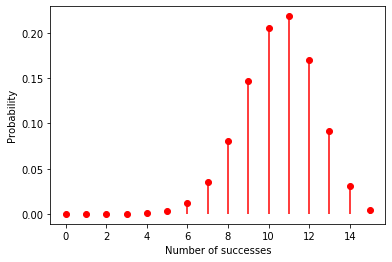

In [7]:
# consider a binomial RV X with n=15 and p=0.7
# note that scipy.stats has been imported with short name stats
# create the distribution
n = 15
p = 0.7
rv = stats.binom(n, p)
# this is called a frozen distribution and can be used to 
# calculate various values associated with it.

# pmf is the probability mass function.
# So to calculate the probability of, say, 8 successes use
print(f"Pr(X=8) = {rv.pmf(8)}")

# The pmf function takes a numpy array as input and will 
# return an array of probability masses.
# Knowing we must have between 0 and 15 successes we can 
# plot the whole distribution very simply:
xs = np.arange(16) # values 0 to 15 as a numpy array
plt.figure()
color = 'r'
plt.vlines(xs, 0, rv.pmf(xs), color=color)
plt.plot(xs, rv.pmf(xs), 'o', color=color)
plt.xlabel('Number of successes')
plt.ylabel('Probability')


# cdf is the cumulative distribution function
# so to calculate the probability of, say, 6 or fewer successes use
print(f"Pr(X<=6) = {rv.cdf(6)}")

# There are other useful functions too, such as the percent
# point function, ppf, which is used for percentiles. You can
# explore these in your own time.


## Exercise F

You are going to explore the `scipy.stats` functionality to calculate various values associated with the binomial and hypergeometric distribution. Look up the documentation for `scipy.stats.binom` and `scipy.stats.hypergeom`. 

A toy manufacturer produces a particular to from a manufacturing process with a probability of fault of $0.01$. Assuming the faults are independent, if the manufacturing process produces $500$ copies of the toy, with what probability will there be:

1. Exactly 4 faults.
2. Exactly 10 faults.
3. 10 or fewer faults.

*Hint: Is this a binomial or a hypergeometric distribution? What are the parameters*

The toy manufacturer produces $500$ copies of the toy and there are $10$ faults. Assuming a retailer purchases $50$ units from the manufacturer, with what probability will the retailer have:

4. No faulty units.
5. 1 faulty unit
6. 3 or more faulty units.

*Hint: Is this a binomial or a hypergeometric distribution? What are the parameters*


In [13]:
## to complete
print("Questions F.1-3")
# In the first instance we have a binomial with n= 500 and p=0.01
n = 500
p = 0.01
rv1 = stats.binom(n, p)
# Part 1
print(f"Pr(exactly 4 faults) = {rv1.pmf(4):.4f}")
# Part 2
print(f"Pr(exactly 10 faults) = {rv1.pmf(10):.4f}")
# Part 3
print(f"Pr(10 or fewer faults) = {rv1.cdf(10):.4f}")
print()

print("Questions F.4-6")
# For the second situtation we have a hypergeometric distribution
# using the variable names from the slides we have N=500 total possibilities
# K=10 items of interest (faults), and n=50 selections from the total
# Note that scipy respectively calls these variables M, n and N.
N = 500
K = 10
n = 50
rv2 = stats.hypergeom(N, K, n)
# Part 1
print(f"Pr(No faulty units) = {rv2.pmf(0):.4f}")
# Part 2
print(f"Pr(exactly 1 faulty unit) = {rv2.pmf(1):.4f}")
# Part 3
print(f"Pr(3 or more faulty units) = 1 - Pr(2 or fewer faulty units) = {1 - rv2.cdf(2):.4f}")


Questions F.1-3
Pr(exactly 4 faults) = 0.1760
Pr(exactly 10 faults) = 0.0179
Pr(10 or fewer faults) = 0.9868

Questions F.4-6
Pr(No faulty units) = 0.3452
Pr(exactly 1 faulty unit) = 0.3913
Pr(3 or more faulty units) = 1 - Pr(2 or fewer faulty units) = 0.0683
